## File handling
- Defining file paths
- Reading the data, skip its header, clean each line of non-numerical characters. Converts the cleaned lines into a Numpy array of floats and compile it intp a 2D array
- Test data is read from file as a string, cleaned and converted into a 1D array (np.fromstring). Then reshaped into a 2D array using .reshape(-1, 2).


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math 

# Define file paths for the data
test_points_path = "C:/Users/utjis/OneDrive - Handelsakademin/Python-Github/Python-Richard-Boden-OPA23/Data/test_points.txt"
pikachu_path = "C:/Users/utjis/OneDrive - Handelsakademin/Python-Github/Python-Richard-Boden-OPA23/Data/pikachu.txt"
pichu_path = "C:/Users/utjis/OneDrive - Handelsakademin/Python-Github/Python-Richard-Boden-OPA23/Data/pichu.txt"

# Function to read data from file and convert it to numpy array
def read_and_convert(file_path):
    data = []
    with open(file_path, 'r') as file:
        # Skip first part (header)
        next(file) # https://stackoverflow.com/questions/4796764/read-file-from-line-2-or-skip-header-row
        for line in file:
            # Clear parantheses and any non-numerical characters that are not commas or decimal points.
            cleaned_line = line.strip().replace('(', '').replace(')', '') # Removes blank spaces and opening and closing parantheses.
            # convert to a numpy array of float using fromstring()
            point = np.fromstring(cleaned_line, dtype=float, sep=',') # # Convert string to a numpy array using commas as separators. https://www.w3resource.com/numpy/array-creation/fromstring.php
            data.append(point) # append the array to the data list
    
    return np.array(data) # Converts list of arrays into 2d numpy array and return it

with open(test_points_path, 'r') as file:
    data_str = file.read()

data_str_cleaned = data_str.replace('(', '').replace(')', '')
# convert the string into a 1d numpy array of float
test_data_np = np.fromstring(data_str_cleaned, dtype=float, sep=', ')
# reformat to 2d-array with 2 columns (x, y)
test_data_np = test_data_np.reshape(-1, 2) # The '-1' in reshape allows numpy to automatically determine the appropriate number of rows. https://stackoverflow.com/questions/12575421/convert-a-1d-array-to-a-2d-array-in-numpy

pikachu_data_np = read_and_convert(pikachu_path)
pichu_data_np = read_and_convert(pichu_path)


## PLOT with test points, Pichu and Pikachu data
- Creates a scatter plot visualizing the data points for Pichu, Pikachu and test samples based on the data given.
- Pichu will be black. Pikachu yellow and test samples will be blue.
- plt... makes the plot look understandable.


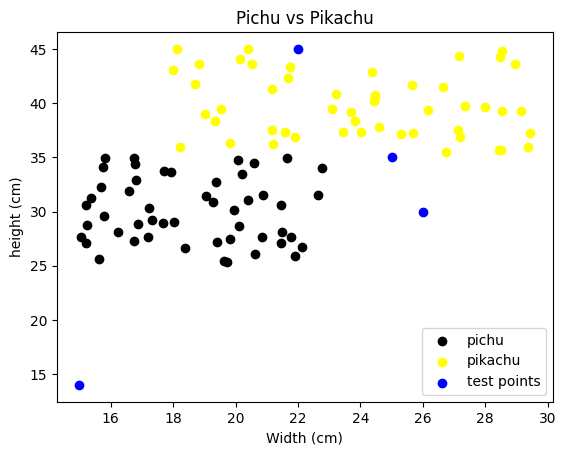

In [2]:
# Scatter plots
# ..._data_np[:, 0] extracts x-values (width)
# ... data_np[:, 1] extracts y-values (height)
# color='' sets color to the dots
# label= set the "name" of the plots
plt.scatter(pichu_data_np[:, 0], pichu_data_np[:, 1], color='black', label='pichu')
plt.scatter(pikachu_data_np[:, 0], pikachu_data_np[:, 1], color='yellow', label='pikachu')
plt.scatter(test_data_np[:, 0], test_data_np[:, 1], color='blue', label='test points')

plt.xlabel('Width (cm)')
plt.ylabel('height (cm)')
plt.title('Pichu vs Pikachu')
plt.legend()
plt.show()

## Count the distance between test points
- Defining a function to classify the test points as either Pichu or Pikachu, with an euclidean algorithm.
- np.inf (infinity) ensures that the first distance calc between a test point and pichu/pikachu data will be smaller than its inital value.
- Compare the test points vs pichu/pikachu points using a for loop and if-statement. returns a classification variable.

In [3]:
def euclidean(point1, point2): # Calculate the euclidean distance between two points
        x1, y1 = point1
        x2, y2 = point2
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def classify(test_data_np, pichu_data_np, pikachu_data_np): # Function to classify a test point based on distance
     
    # Initialize variables to keep track of the closest point and its classification.
    closest_distance = np.inf # Chat-gpt helped me here.
    classification = None

    # Compare the test point to all Pichu points.
    for point in pichu_data_np:
        distance = euclidean(test_data_np , point)
        if distance < closest_distance:
            closest_distance = distance
            classification = 'Pichu'
    
    # Repeat comparison for Pikachu points.
    for point in pikachu_data_np:
        distance = euclidean(test_data_np , point)
        if distance < closest_distance:
            closest_distance = distance
            classification = 'Pikachu'
    
    return classification

# Classify each test point and print the results.
for test_point in test_data_np:
    result = classify(test_point, pichu_data_np, pikachu_data_np)
    print(f"Sample with (Width, Height) {test_point} Classified as {result}")

Sample with (Width, Height) [25. 35.] Classified as Pikachu
Sample with (Width, Height) [15. 14.] Classified as Pichu
Sample with (Width, Height) [26. 30.] Classified as Pichu
Sample with (Width, Height) [22. 45.] Classified as Pikachu


## User input (task 1)
- Lets the user inputs data for width and height and returns them as a numpy array.
- Error handling for non-numerical and negative numbers.
- Classifies the data as Pichu or Pikachu.

In [12]:
def user_input(): # Function for user input with error handling.
    while True:
        try:
            width = float(input("Please enter the width in cm: "))
            height = float(input("Please enter the height in cm: "))
            if width <= 0 or height <= 0:
                print("Both width and height needs to be positive, please try again")
            else :
                return np.array([width, height])

        except ValueError:
            print("Only numerical values")


user_point = user_input()

result = classify(user_point, pichu_data_np, pikachu_data_np) # Classifies the data as pichu or pikachu using the classify() function from previous code.
print(f"User input width {user_point[0]} cm and height {user_point[1]} cm,  classifies as {result} ")





User input width 36.0 cm and height 21.0 cm,  classifies as Pichu 


## Five closest Knn (Task 2)
- https://www.python-engineer.com/courses/mlfromscratch/01_knn/ 
- Try 1. It works, will do another one by myself from scratch below this one because this isnt my code. Just wanted to try it. 
- So this doesn't count.

In [16]:
from collections import Counter

class KNN: 
    def __init__(self, k=5):
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    def _predict(self, x):
        distances = [euclidean(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

X_train = np.vstack((pichu_data_np, pikachu_data_np)) # Combine the data for Pichu and Pikachu into a single training dataset.
y_train = np.array([0] * len(pichu_data_np) + [1] * len(pikachu_data_np)) # Create the target labels (0 for Pichu, 1 for Pikachu).

knn = KNN(k=5)
knn.fit(X_train, y_train)

user_point = user_input() # Collect a sample from the user.

predictions = knn.predict([user_point]) # Use the KNN model to predict the label of the user's sample.

label = "Pikachu" if predictions[0] == 1 else "Pichu" # ternery operator
print(f"User input classifies as {label}")

User input classifies as Pikachu


### Five Closest (Task 2) try 2!
- More simple than the one above imo.
- List comprehension
- Function (Knn)
- Pretty straight forward

In [18]:
label_pichu_data = [('pichu', point) for point in pichu_data_np] # labels every pichu datapoint as pichu
label_pikachu_data = [('pikachu', point) for point in pikachu_data_np] # labels every pikachu datapoint as pikachu

data = label_pichu_data + label_pikachu_data # combines both lists to one.
input_point = user_input()


def knn(data, input_point, k=5):
    distances = [] # empty list to store distances between input and each data point

    for label, point in data: # Calculate the distance from input_point to every point in the list.
        distance = euclidean(point, np.array(input_point))
        distances.append((label, distance)) #append a tuple of label and distance to the list

    distances.sort(key=lambda x: x[1]) # Sort the list in place based on distance. 'key=lambda x: x[1]' set the sort to be based on the second element in every tuple (distance), so that the list is sorted from closest to furthest away.

    nearest_neighbors = distances[:k] # select the first 5 k elements from the sorted list.
    counts = {} # an empty dict to store counts of each label.
    
    for neighbor in nearest_neighbors: # loop through nearest_neighbors.  
        label = neighbor[0] # extract the label of the neighbor.
        counts[label] = counts.get(label, 0) + 1 # Count occurrences of each label, defaulting to 0 if not already present.

    predict = max(counts, key=counts.get) # gets the most common label. https://www.w3resource.com/python-exercises/dictionary/python-data-type-dictionary-exercise-80.php
    
    return predict


result = knn(data, input_point) # Use the KNN function to classify the input point and print the result.
print(f"\nThe predicted class for the input point {input_point} is: {result}")





The predicted class for the input point [25. 35.] is: pikachu


## Summary

- A fun little project. I decided to stop at the (G) tasks because i wanted to spend more time learning python and everything around it. I guess i could have written the code with a higher grade of DRY, by doing some functions or tweaking the ones i have (Read data and test data, compare data points) but decided to leave it as it was. The first KNN code is mostly taken from the video i linked. Made a new KNN code from scratch that worked just as good. I have asked LLM (Chatgpt) for help sometimes but ive found that googling and reading about the problems online is more educational for me. And i can say that i really like to work in jupyter notebook. I have tested everything and it seems to work as intended. 